In [408]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import numpy as np
from scipy.signal import argrelmin
%matplotlib inline
import pandas as pd
import os

In [160]:
directory = '/home/nefta/thesis/results/wg3_2/supercurrent/use/'
#directory = '/home/nefta/thesis/results/hb/supercurrent/vsg=0.0-20171114-11:38:40/'
#W = 918 
#L = 204
# w , l = a * np.shape(scattering_regsion)
W = 360
L = 100

In [161]:
vsg_values = [float(x[4:-18]) for x in list(os.walk(directory))[0][1]]
vsg_dirs = dict(zip(vsg_values, list(os.walk(directory))[0][1]))

In [239]:
def flip_minima(abs_values, real_values, minima_order):
    main_peak = np.argmax(abs_values) # index of main peak
    left_min = [0]
    right_min = [main_peak]
    print(argrelmin(abs_values, order=20)[0])
    
    for loc_min in argrelmin(abs_values, order=minima_order)[0]:
    #for loc_min in[  3, 334, 389, 610, 665, 996]:#[  3, 157, 334, 389, 610, 665, 842, 996]
        if loc_min < main_peak:
            left_min.append(loc_min)
        else: right_min.append(loc_min)
    left_min.append(main_peak)
    right_min.append(len(abs_values))
    left_min_rev = list(reversed(left_min))
    
    #print(left_min, right_min, left_min_rev)
    osc = []
    n = len(left_min)
    for i in range(n - 1):
        #print(n-i - 1, n-i-2)
        for index in range(left_min_rev[n  - i - 1], left_min_rev[n - i - 2]):
            #osc.append((-1)**(i+1) * abs(real_values[index]))
            osc.append((-1)**(n - i) * abs(real_values[index]))
    for i in range(n - 1):
        #print(i, i+1)
        for index in range(right_min[i], right_min[i+1]):
            osc.append((-1)**i * abs(real_values[index]))
    return(argrelmin(abs_values, order=minima_order), osc)

In [240]:
def transform_to_density(b_values, real, imag, y_values):
    omega = 2 * np.pi / W
    
    phi_values = b_values * W * L 
    dPhi = phi_values[1] - phi_values[0]
    maxPhi = phi_values[-1]
    Jy_values = []
    for y in y_values:
        Jy_real = 0
        Jy_imag = 0
        for k, phi in list(enumerate(phi_values)):
            Ic_real = real[k] #Fourier coefficient
            Ic_imag = imag[k]
            Jy_real += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_real * np.cos(omega * phi * y) - Ic_imag * np.sin(omega * phi * y)) * dPhi
            Jy_imag += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_imag * np.cos(omega * phi * y) + Ic_real * np.sin(omega * phi * y)) * dPhi
        Jy_abs = np.sqrt(Jy_real**2 + Jy_imag**2)
        Jy_values.append(Jy_abs)
    print(len(Jy_values))
    return(Jy_values)

In [301]:
vsg_val = -0.95

In [302]:
dirname = directory + vsg_dirs[vsg_val] + '/'
absvalues, realvalues, imagvalues = pd.read_csv(dirname + 'data.csv', header=None).values.T

In [303]:
minima, realpart_flipped = flip_minima(absvalues, realvalues, 15)

[]


In [304]:
minima

(array([], dtype=int64),)

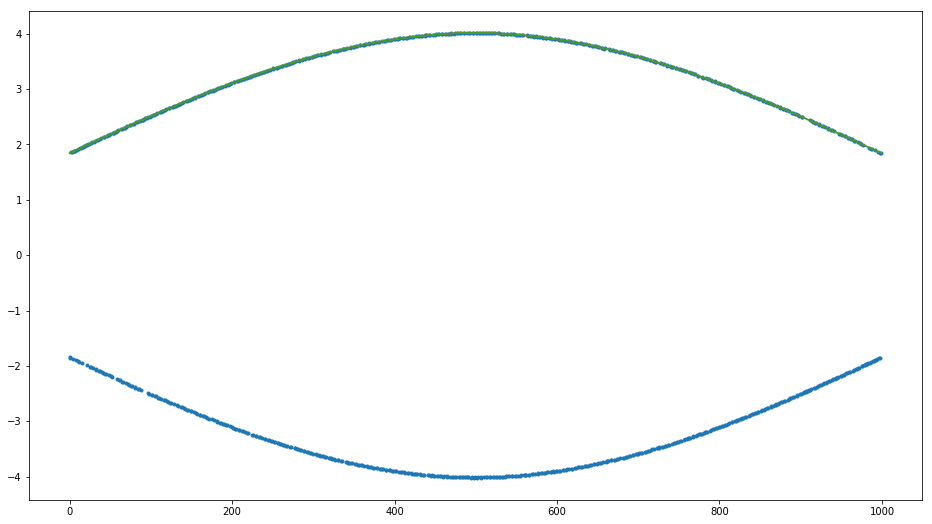

In [305]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(realvalues, linestyle='None', marker='.')
ax.plot(realpart_flipped),
ax.plot(abs(realvalues))

In [ ]:
maxB = 0.00015
nb_points = 1000
bvalues = np.linspace(-maxB, maxB, nb_points)
#yvalues = np.linspace(-1.5*W, 1.5*W, 500)
yvalues = np.linspace(-1.5*W, 1.5*W, 500)

#x = transform_to_density(bvalues, abs(realvalues), imagvalues, yvalues)

fig, ax = plt.subplots()
ax.plot(x)

pd.DataFrame(x).to_csv(dirname+'fourier-data.csv', index=False)

In [361]:
fourier_dir = '/home/nefta/thesis/results/wg3_2/supercurrent/use/fourier/'
#test_dir = '/home/nefta/thesis/results/wg3_2/supercurrent/use/fourier/vsg=-0.2-20171105-13:54:56/'

In [362]:
vsg_values = [float(x[4:-18]) for x in list(os.walk(fourier_dir))[0][1]]
vsg_dirs = dict(zip(vsg_values, list(os.walk(fourier_dir))[0][1]))

In [365]:
vsg_dirs[-0.15]

'vsg=-0.15-20171105-13:50:47'

In [376]:
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

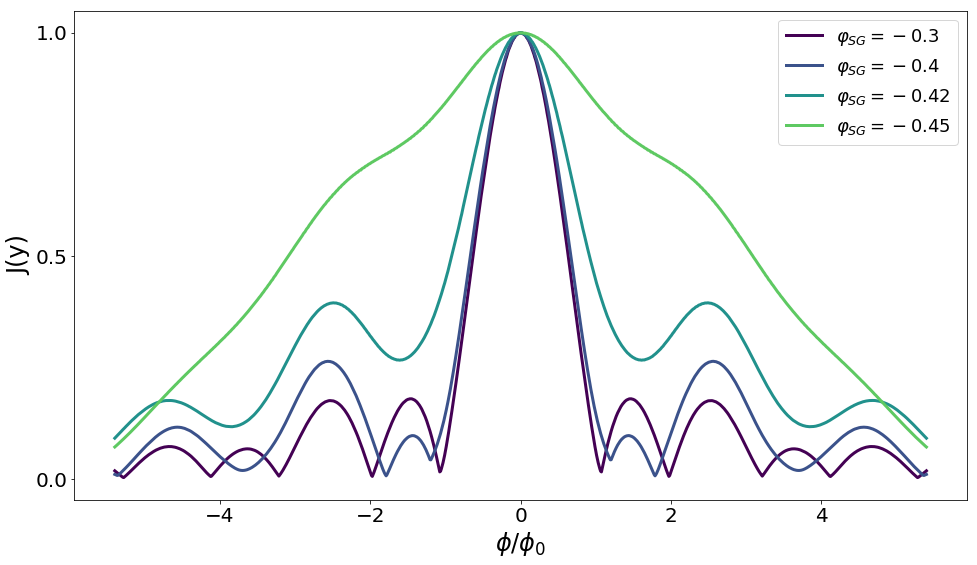

In [406]:
ticklabelsize = 20
fontlabelsize = 24
fig, ax = plt.subplots(figsize=(16, 9))
vsg_vals = [ -0.3, -0.4, -0.42, -0.45]
colordelta = round(cmap.N / len(vsg_vals))
for index, value in enumerate(vsg_vals):
    data = pd.read_csv(fourier_dir +  vsg_dirs[value] + '/data.csv',
                       header=None)[0].values
    iczero = np.amax(data)
    ax.plot(bvalues*W*L, data/ iczero, label=r'$\varphi_{{SG}}={}$'.format(value), 
            color=cmap(index*colordelta), linewidth=3)

ax.legend(prop={'size': 18})
#ax.xaxis.set_ticks([-W/2, W/2])
#ax.xaxis.set_ticklabels(['-W/2', '+W/2'])
ax.yaxis.set_ticks([0, 0.5, 1])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_ylabel('J(y)',fontsize=fontlabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)

fig.savefig('waveguide-ic.eps')
#for fdir in list(os.walk(fourier_dir))[0][1]:
#    data = pd.read_csv(fourier_dir + fdir + '/fourier-data.csv', delimiter=' ', header=None)
#    plt.plot(data)
#    plt.show()

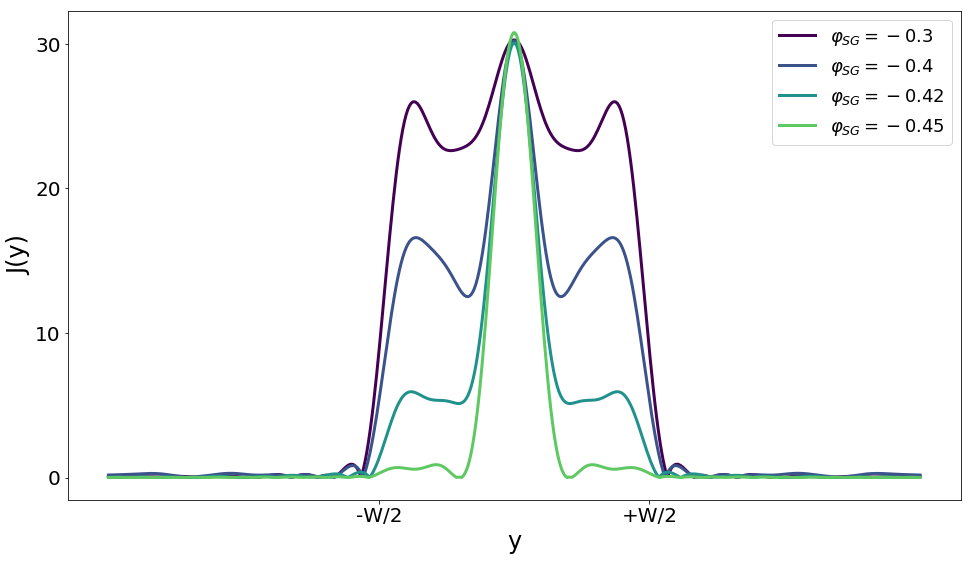

In [407]:
ticklabelsize = 20
fontlabelsize = 24
fig, ax = plt.subplots(figsize=(16, 9))
#vsg_vals = [-0.1, -0.3, -0.35, -0.4, -0.45]
colordelta = round(cmap.N / len(vsg_vals))
for index, value in enumerate(vsg_vals):

    data = pd.read_csv(fourier_dir +  vsg_dirs[value] + '/fourier-data.csv',
                       header=None, delimiter=' ')[0].values[1:]
    ax.plot(yvalues, data, label=r'$\varphi_{{SG}}={}$'.format(value), 
            color=cmap(index*colordelta), linewidth=3)

ax.legend(prop={'size': 18})
ax.xaxis.set_ticks([-W/2, W/2])
ax.xaxis.set_ticklabels(['-W/2', '+W/2'])
ax.yaxis.set_ticks([0, 10, 20, 30])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_ylabel('J(y)',fontsize=fontlabelsize)
ax.set_xlabel('y', fontsize=fontlabelsize)

fig.savefig('waveguide-jy.eps')

#for fdir in list(os.walk(fourier_dir))[0][1]:
#    data = pd.read_csv(fourier_dir + fdir + '/fourier-data.csv', delimiter=' ', header=None)
#    plt.plot(data)
#    plt.show()